# Output File Analysis - Single SRR - Donor to Recipient Workflow

## Variables

In [2]:
## Variables
srr_name <- "SRR5090597"
donor_name <- "hpv16"
recipient_name <- "UCSChg38"
inputs_folder <- "../../wallaby/workflows/cromwell-final-outputs-hpv16-rnaseq"
donor_ref_genome <- "../../wallaby/data/ref_genomes/hpv/HPV16.fa"
recipient_ref_genome <- "../../wallaby/data/ref_genomes/human/hg38.fa"

## Import Libraries

In [3]:
## Setup Environment
# Enable multithreading when possible (library dependent)
options(Ncpus = parallel::detectCores())
Sys.setenv(OMP_NUM_THREADS=toString(parallel::detectCores()))
Sys.setenv(OMP_THREAD_LIMIT=toString(parallel::detectCores()))
Sys.setenv(OMP_NUM_THREADS=parallel::detectCores())
Sys.setenv(OMP_THREAD_LIMIT=parallel::detectCores())

## Load or install and load all libraries
suppressPackageStartupMessages(library("pacman", character.only = TRUE))

# List of CRAN packages to either Load, or Install and Load
pacman::p_load(dplyr, ggplot2, shiny, shinyLP, DT,  ggrepel,  tidyr, 
               data.table, kableExtra, knitr, IRdisplay, install = FALSE)

# List of Bioconductor packages to either Load, or Install and Load
pacman::p_load(BSgenome, BSgenome.Hsapiens.UCSC.hg38, GenomicFeatures, 
               GenomicAlignments,  Rsubread,  Rsamtools, bamsignals,  
               rtracklayer, GenomicRanges, org.Hs.eg.db, Organism.dplyr,
               TxDb.Hsapiens.UCSC.hg38.knownGene, regioneR, karyoploteR,
               seqinr, Repitools, Gviz, Biostrings, install = FALSE)

## Load Files for Analysis

In [4]:
# Select crossings to import and order of visualization
crossings <- c("UMd_MMr", "MUd_MMr", "UMd_MUr", "MUd_UMr", "MMd_UMr", "MMd_MUr")

In [5]:
# Load all .bed files created by the cromwell workflow
donor_granges <- list()
recip_granges <- list()

for (cross in crossings){
    donor_granges[[length(donor_granges) + 1]] <- import(list.files(inputs_folder, 
                                                                    pattern=paste(srr_name, 
                                                                                  '-to-',
                                                                                  donor_name, 
                                                                                  "_", cross, 
                                                                                  ".bed", 
                                                                                  sep = ""), 
                                                                    recursive = TRUE,
                                                                    full.names = TRUE))
    
    recip_granges[[length(recip_granges) + 1]] <- import(list.files(inputs_folder,
                                                                    pattern=paste(srr_name, 
                                                                                  '-to-',
                                                                                  recipient_name,
                                                                                  "_", cross, 
                                                                                  ".bed", 
                                                                                  sep = ""), 
                                                                    recursive = TRUE, 
                                                                    full.names = TRUE))
}

In [6]:
# Load recipient .bam files created by the cromwell workflow
donor_bams <- list()
recip_bams <- list()

for (cross in crossings){
    recip_bams[[length(recip_bams) + 1]] <- list.files(inputs_folder,
                                                       pattern=paste(srr_name, 
                                                                     '-to-',
                                                                     recipient_name,
                                                                     "_", cross, 
                                                                     ".bam$", 
                                                                     sep = ""), 
                                                       recursive = TRUE, 
                                                       full.names = TRUE)
}

In [7]:
reads_UMd_MMr <- readGAlignments(recip_bams[[1]], param=ScanBamParam(what="seq"))
reads_MMd_UMr <- readGAlignments(recip_bams[[4]], param=ScanBamParam(what="seq"))

In [8]:
reads_UMd_MMr_df <- unique(data.frame(matrix(mcols(reads_UMd_MMr)$seq),stringsAsFactors=FALSE))
reads_MMd_UMr_df <- unique(data.frame(matrix(mcols(reads_MMd_UMr)$seq),stringsAsFactors=FALSE))

In [9]:
library(zoo)


Attaching package: 'zoo'


The following objects are masked from 'package:Rsamtools':

    index, index<-


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




In [10]:
reads_UMd_MMr_df[1,1]
reads_MMd_UMr_df[1,1]

[1] "TGGCATTCTTAGTGCTTCTCTTAACACTACAGTAAATTAATGAATTCGGCGGGTAATCAATTCTATGACTTGCCTGGCTACTGGCCACTTTCCTGTTCTCA"

[1] "GAAGGACTGGAGCAAGGTCGTCCTGGCCTATGAGCCTGTGTGGGCCATTGGTACTGGCAAGACTGCAACACCCCAACAGGCCCAGGAAGTACA"

In [11]:
nrow(reads_UMd_MMr_df)

[1] 91

In [12]:
nrow(reads_MMd_UMr_df)

[1] 178

In [13]:
df <- data.frame(id = 1:2, seq = c(reads_UMd_MMr_df[1,1], reads_MMd_UMr_df[1,1]))
df <- with (df, data.frame (t(sapply(strsplit(as.character(seq), ""), rollapplyr, 4, paste, collapse = "")), check.names = FALSE, stringsAsFactors = FALSE))
df

1,2
<list>,<list>
"TGGC, GGCA, GCAT, CATT, ATTC, TTCT, TCTT, CTTA, TTAG, TAGT, AGTG, GTGC, TGCT, GCTT, CTTC, TTCT, TCTC, CTCT, TCTT, CTTA, TTAA, TAAC, AACA, ACAC, CACT, ACTA, CTAC, TACA, ACAG, CAGT, AGTA, GTAA, TAAA, AAAT, AATT, ATTA, TTAA, TAAT, AATG, ATGA, TGAA, GAAT, AATT, ATTC, TTCG, TCGG, CGGC, GGCG, GCGG, CGGG, GGGT, GGTA, GTAA, TAAT, AATC, ATCA, TCAA, CAAT, AATT, ATTC, TTCT, TCTA, CTAT, TATG, ATGA, TGAC, GACT, ACTT, CTTG, TTGC, TGCC, GCCT, CCTG, CTGG, TGGC, GGCT, GCTA, CTAC, TACT, ACTG, CTGG, TGGC, GGCC, GCCA, CCAC, CACT, ACTT, CTTT, TTTC, TTCC, TCCT, CCTG, CTGT, TGTT, GTTC, TTCT, TCTC, CTCA","GAAG, AAGG, AGGA, GGAC, GACT, ACTG, CTGG, TGGA, GGAG, GAGC, AGCA, GCAA, CAAG, AAGG, AGGT, GGTC, GTCG, TCGT, CGTC, GTCC, TCCT, CCTG, CTGG, TGGC, GGCC, GCCT, CCTA, CTAT, TATG, ATGA, TGAG, GAGC, AGCC, GCCT, CCTG, CTGT, TGTG, GTGT, TGTG, GTGG, TGGG, GGGC, GGCC, GCCA, CCAT, CATT, ATTG, TTGG, TGGT, GGTA, GTAC, TACT, ACTG, CTGG, TGGC, GGCA, GCAA, CAAG, AAGA, AGAC, GACT, ACTG, CTGC, TGCA, GCAA, CAAC, AACA, ACAC, CACC, ACCC, CCCC, CCCA, CCAA, CAAC, AACA, ACAG, CAGG, AGGC, GGCC, GCCC, CCCA, CCAG, CAGG, AGGA, GGAA, GAAG, AAGT, AGTA, GTAC, TACA"


In [14]:
ncol(df)

[1] 2

In [15]:
space1 <- as.list(as.data.frame(t(df[,1])))[[1]][[1]]
space1

[1] "TGGC" "GGCA" "GCAT" "CATT" "ATTC" "TTCT" "TCTT" "CTTA" "TTAG" "TAGT"
[11] "AGTG" "GTGC" "TGCT" "GCTT" "CTTC" "TTCT" "TCTC" "CTCT" "TCTT" "CTTA"
[21] "TTAA" "TAAC" "AACA" "ACAC" "CACT" "ACTA" "CTAC" "TACA" "ACAG" "CAGT"
[31] "AGTA" "GTAA" "TAAA" "AAAT" "AATT" "ATTA" "TTAA" "TAAT" "AATG" "ATGA"
[41] "TGAA" "GAAT" "AATT" "ATTC" "TTCG" "TCGG" "CGGC" "GGCG" "GCGG" "CGGG"
[51] "GGGT" "GGTA" "GTAA" "TAAT" "AATC" "ATCA" "TCAA" "CAAT" "AATT" "ATTC"
[61] "TTCT" "TCTA" "CTAT" "TATG" "ATGA" "TGAC" "GACT" "ACTT" "CTTG" "TTGC"
[71] "TGCC" "GCCT" "CCTG" "CTGG" "TGGC" "GGCT" "GCTA" "CTAC" "TACT" "ACTG"
[81] "CTGG" "TGGC" "GGCC" "GCCA" "CCAC" "CACT" "ACTT" "CTTT" "TTTC" "TTCC"
[91] "TCCT" "CCTG" "CTGT" "TGTT" "GTTC" "TTCT" "TCTC" "CTCA"

In [16]:
space2 <- as.list(as.data.frame(t(df[,2])))[[1]][[1]]
space2

[1] "GAAG" "AAGG" "AGGA" "GGAC" "GACT" "ACTG" "CTGG" "TGGA" "GGAG" "GAGC"
[11] "AGCA" "GCAA" "CAAG" "AAGG" "AGGT" "GGTC" "GTCG" "TCGT" "CGTC" "GTCC"
[21] "TCCT" "CCTG" "CTGG" "TGGC" "GGCC" "GCCT" "CCTA" "CTAT" "TATG" "ATGA"
[31] "TGAG" "GAGC" "AGCC" "GCCT" "CCTG" "CTGT" "TGTG" "GTGT" "TGTG" "GTGG"
[41] "TGGG" "GGGC" "GGCC" "GCCA" "CCAT" "CATT" "ATTG" "TTGG" "TGGT" "GGTA"
[51] "GTAC" "TACT" "ACTG" "CTGG" "TGGC" "GGCA" "GCAA" "CAAG" "AAGA" "AGAC"
[61] "GACT" "ACTG" "CTGC" "TGCA" "GCAA" "CAAC" "AACA" "ACAC" "CACC" "ACCC"
[71] "CCCC" "CCCA" "CCAA" "CAAC" "AACA" "ACAG" "CAGG" "AGGC" "GGCC" "GCCC"
[81] "CCCA" "CCAG" "CAGG" "AGGA" "GGAA" "GAAG" "AAGT" "AGTA" "GTAC" "TACA"

[1] "TGGC" "TGGC" "GGCA" "CATT" "AACA" "AACA" "ACAC" "TACA" "ACAG" "AGTA"
[11] "ATGA" "GGTA" "CTAT" "TATG" "ATGA" "GACT" "GACT" "GCCT" "GCCT" "CCTG"
[21] "CCTG" "CTGG" "CTGG" "CTGG" "TGGC" "TGGC" "TACT" "ACTG" "ACTG" "ACTG"
[31] "CTGG" "CTGG" "CTGG" "TGGC" "TGGC" "GGCC" "GGCC" "GGCC" "GCCA" "TCCT"
[41] "CCTG" "CCTG" "CTGT"

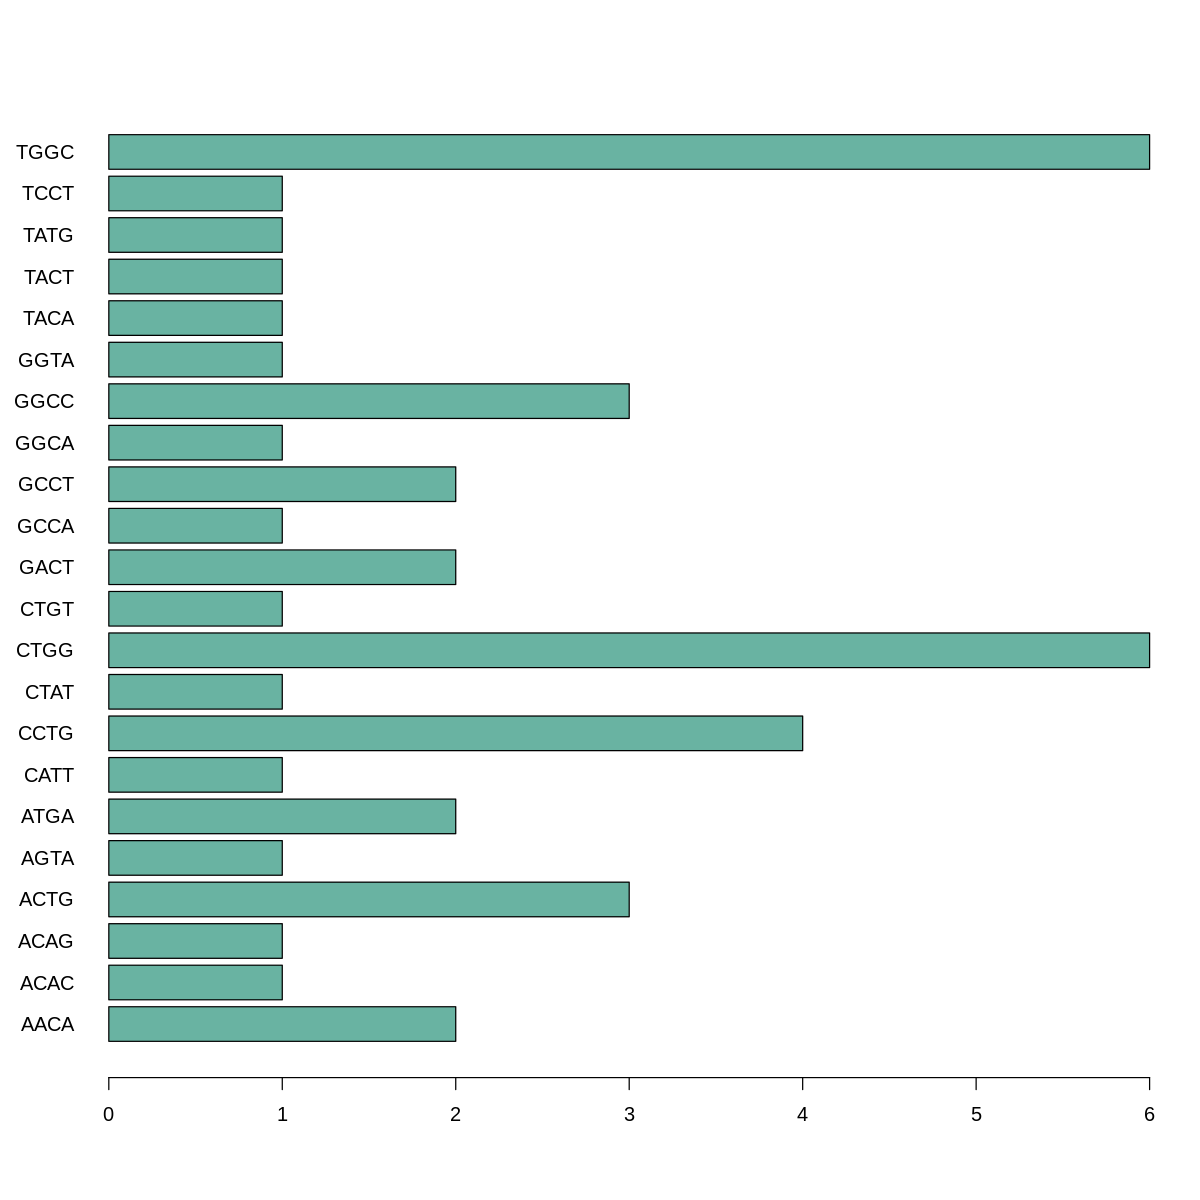

In [18]:
miniseq_in_miniseqlist <- function(miniseq, miniseqlist) {
    matches <- c()
    for (item in miniseqlist) {
        if (tolower(item) == tolower(miniseq)){
            matches <- c(matches, miniseq)
        }  
    }
    return(matches)
}

miniseqlist_in_miniseqlist <- function(miniseqlist1, miniseqlist2) {
    matches <- c()
    for (miniseq in miniseqlist1) {
        matches <- c(matches, miniseq_in_miniseqlist(miniseq, miniseqlist2))
    }
    return(matches)
}



miniseqlist_in_miniseqlist(space1, space2)

options(repr.plot.width=10, repr.plot.height=10)
barplot(table(miniseqlist_in_miniseqlist(space1, space2)), horiz=T, las=1, col="#69b3a2")

## Helper Functions

In [19]:
# Function to create a visualization of the donor crossings
create_viz_donor <- function(ref_genome = "hg38", 
                             granges, 
                             granges_labels,
                             title_prepend = "") {

    # reverse order of granges and granges_labels so that they plot in the right order
    # as plotKaryotype reverses it again
    granges <- rev(granges)
    granges_labels <- rev(granges_labels)
    
    # Set up plot parameters
    plot.type <- 4
    tracks <- length(granges)
    track_sep <- 0.05
    track_width <- 1 / (tracks) - track_sep
    window.size <- 10
    title <- paste(title_prepend, "- reads density graph - window size (in bases): ", window.size)
    pp <- getDefaultPlotParams(plot.type=plot.type)
    pp$leftmargin <- 0.17
    
    # Create a custom granges object for the Donor Reference Genome
    summary_fasta <- summary(read.fasta(ref_genome))
    total_genome_length <- as.integer(summary_fasta[, "Length"])
    seqname <- unique(as.character(seqnames(granges[[1]])))
    custom.genome <- toGRanges(data.frame(chr = c(seqname), 
                                          start = c(1), 
                                          end = c(total_genome_length)))
    
    # Create the object for plotting
    kp <- plotKaryotype(genome = custom.genome,
                        plot.type = plot.type, 
                        plot.params = pp, 
                        labels.plotter = NULL, 
                        main = title,
                        cex = 2)
    kpAddBaseNumbers(kp, tick.dist = window.size * 50, add.units = TRUE, cex = 2) 

    # Create the tracks in the plot, depending on how many tracks there are
    track_no <- 0
    for (grange in granges) {
        track_no <- track_no + 1
        
        r0 <- (track_no-1) * track_width + (track_no-1) * track_sep
        r1 <- track_no * track_width + (track_no-1) * track_sep
        
        kp <- suppressWarnings(kpPlotDensity(kp, data = grange, 
                                             window.size = window.size, 
                                             col = "blue", r0 = r0, r1 = r1))
        kpAxis(kp, ymax = kp$latest.plot$computed.values$max.density, 
               cex = 2, 
               r0 = r0, r1 = r1)
        kpAddLabels(kp, labels = granges_labels[track_no], 
                    r0 = r0, r1 = r1, 
                    label.margin = 0.07, cex = 2)
    }
}

In [20]:
# Function to create a visualization of the recipient crossings
create_viz_recipient <- function(graph_type = "recipient", 
                                 ref_genome = "hg38", 
                                 granges,
                                 granges_labels, 
                                 title_prepend = "") {

    # reverse order of granges and granges_labels so that they plot in the right order
    # as plotKaryotype reverses it again
    granges <- rev(granges)
    granges_labels <- rev(granges_labels)
    
    # Set up plot parameters
    plot.type <- 4
    tracks <- length(granges)
    track_sep <- 0.05
    track_width <- 1 / (tracks) - track_sep
    genome = "hg38"
    window.size <- 1e6
    title <- paste(title_prepend, "- reads density graph - window size (in bases): ", window.size)
    pp <- getDefaultPlotParams(plot.type=plot.type)
    pp$leftmargin <- 0.17
    
    # Create the object for plotting
    kp <- plotKaryotype(genome = ref_genome,
                        plot.type = plot.type, 
                        plot.params = pp, 
                        labels.plotter = NULL, 
                        main = title,
                        cex = 2)
    kpAddChromosomeNames(kp, srt = 90, cex = 2) 
    
    # Create the tracks in the plot, depending on how many tracks there are
    track_no <- 0
    for (grange in granges) {
        track_no <- track_no + 1
        
        r0 <- (track_no-1) * track_width + (track_no-1) * track_sep
        r1 <- track_no * track_width + (track_no-1) * track_sep
        
        kp <- suppressWarnings(kpPlotDensity(kp, data = grange, 
                                             window.size = window.size, col = "blue", 
                                             r0 = r0, r1 = r1))
        kpAxis(kp, ymax = kp$latest.plot$computed.values$max.density, 
               cex = 2, 
               r0 = r0, r1 = r1)
        kpAddLabels(kp, labels = granges_labels[track_no], 
                    r0 = r0, r1 = r1,
                    label.margin = 0.07, cex = 2)
    }
}

In [21]:
# Function to Create a Table mapping ranges of overlapping paired-end crossings 
summary_table_donor <- function(granges, 
                                granges_labels, 
                                min_num_crossings = 3, 
                                min_num_reads = 3) {
    
    # convert all granges to dataframes
    granges_df <- lapply(granges, annoGR2DF) 
    # assign all granges labels (crossing names) as each dataframe's name
    names(granges_df) <- granges_labels 
    # flatten all dataframes into a single dataframe, 
    # and use their's respective name as an identifier in a new column named 'crossing'
    merged_df <- bind_rows(granges_df, .id = "crossing") 
    # convert the data.frame to a data.table
    merged_dt <- as.data.table(merged_df)

    # assign each row to a group, based on whether their ranges overlap
    merged_dt[,group := { ir <- IRanges(start, end); subjectHits(findOverlaps(ir, reduce(ir))) }, by = chr]
    # aggregate results by group, and add additional aggregated columns
    merged_final <- merged_dt[, list(start=min(start), 
                                     stop=max(end), 
                                     num_crossings=length(unique(list(crossing)[[1]])),
                                     unique_crossings=list(unique(crossing)),
                                     num_reads=length(list(name)[[1]])
                                     ), by=list(group,chr)]
    
    # filter results using a minimum number of reads and/or crossings
    merged_final <- merged_final[merged_final[, num_reads > (min_num_reads - 1)]]
    merged_final <- merged_final[merged_final[, num_crossings > (min_num_crossings - 1)]]
    
    # delete the 'group' column
    merged_final <- merged_final[, !"group"]

    # format the final table
    merged_final %>%
    kable("html") %>%
        kable_styling(bootstrap_options = "striped", full_width = F, position = "left") %>%
        kable_paper(full_width = F) %>%
        as.character() %>%
        display_html()   
}

In [22]:
# Create a sqlite database from TxDb and corresponding Org packages
# The database provides a convenient way to map between gene, transcript, and protein identifiers.
src <- suppressMessages(suppressWarnings(src_organism("TxDb.Hsapiens.UCSC.hg38.knownGene")))
# Create a full genome sequences for Homo sapiens (Human) as provided by UCSC (hg38, based on GRCh38.p12)
Hsapiens <- BSgenome.Hsapiens.UCSC.hg38

In [23]:
# Function to Create a Table mapping ranges of overlapping paired-end crossings 
summary_table_recipient <- function(granges, 
                                    granges_labels, 
                                    min_num_crossings = 3,
                                    min_num_reads = 3, 
                                    src,
                                    Hsapiens) {
    
    # convert all granges to dataframes
    granges_df <- lapply(granges, annoGR2DF)
    # assign all granges labels (crossing names) as each dataframe's name
    names(granges_df) <- granges_labels
    # flatten all dataframes into a single dataframe, 
    # and use their's respective name as an identifier in a new column named 'crossing'
    merged_df <- bind_rows(granges_df, .id = "crossing")
    # convert the data.frame to a data.table
    merged_dt <- as.data.table(merged_df)

    # assign each row to a group, based on whether their ranges overlap
    merged_dt[,group := { ir <- IRanges(start, end); subjectHits(findOverlaps(ir, reduce(ir))) }, by = chr]
    # aggregate results by group, and add additional aggregated columns
    merged_final <- merged_dt[, list(start=min(start), 
                                     stop=max(end), 
                                     num_crossings=length(unique(list(crossing)[[1]])),
                                     unique_crossings=list(unique(crossing)),
                                     num_reads=length(list(name)[[1]])
                                     ), by=list(group,chr)]
    
    # filter results using a minimum number of reads and/or crossings
    merged_final <- merged_final[merged_final[, num_reads > (min_num_reads - 1)]]
    merged_final <- merged_final[merged_final[, num_crossings > (min_num_crossings - 1)]]
    
    # use the src database to look for the gene names or each crossing overlap region
    # then, add it as a new column
    merged_final$gene_name <- apply(merged_final, 1, FUN = function(x) toString(
        unique(unlist(suppressWarnings(annoGR2DF(
                                transcripts(src, 
                                             filter=~(GRangesFilter(
                                                 GenomicRanges::GRanges(
                                                     paste(toString(x["chr"]), ":", 
                                                           as.integer(x["start"]), "-", 
                                                           as.integer(x["stop"]), sep = "")))), 
                                             columns=c("symbol")))$symbol)))))

    # use the Hsapiens databse to look up the DNA sequence for each crossing overlap region
    # then, add it as a new column
    merged_final$sequence <- apply(merged_final, 1, FUN = function(x) toString(getSeq(Hsapiens, 
                                                                       toString(x["chr"]), 
                                                                       start = as.integer(x["start"]), 
                                                                       end = as.integer(x["stop"]))))
    # delete the 'group' column
    merged_final <- merged_final[, !"group"]
    # add an ID to each row
    merged_final <- merged_final[, id := .I]
    setcolorder(merged_final, c("id", "chr", "start", "stop", "num_crossings", "unique_crossings", "num_reads", "gene_name", "sequence"))
    
    # format the final table
    merged_final %>%
    kable("html") %>%
        kable_styling(bootstrap_options = "striped", full_width = F, position = "left") %>%
        kable_paper(full_width = F) %>%
        column_spec(9, width = "30em", width_max = "30em") %>%
        as.character() %>%
        display_html()

        return(merged_final)
}

In [24]:
# Function to create a visualization for specific overlap regions
plot_reads_region <- function(id = 1, 
                              crossings_table, 
                              extend_left = 20, 
                              extend_right = 20, 
                              ref_genome) {
    
    # extend the graph to the left and right by this margin
    extend_left <- 20
    extend_right <- 20
    
    # extract chromosome, start, and end positions from the given overlap table
    chr <- toString(crossings_table_recipient[id,]$chr)
    start <- toString(crossings_table_recipient[id,]$start - extend_left) 
    end <- toString(crossings_table_recipient[id,]$stop + extend_right)
    
    # create a track which holds gene names
    options(ucscChromosomeNames=TRUE)
    gr_track <- UcscTrack(genome = "hg38", 
                          table = "ncbiRefSeq", 
                          track = 'NCBI RefSeq', 
                          trackType = "GeneRegionTrack",
                          chromosome = chr, 
                          start = start,
                          end = end,
                          rstarts = "exonStarts", 
                          rends = "exonEnds",
                          gene = "name", 
                          symbol = 'name', 
                          transcript = "name",
                          strand = "strand", 
                          showID = TRUE, 
                          geneSymbol = TRUE, 
                          showBandId = TRUE,
                          showID = TRUE,
                          name = "Gene Track", 
                          min.height = 2,
                          max.height = 3, 
                          cex.group = 1)
    
    # convert the gene names to a readable format
    z <- ranges(gr_track)
    suppressMessages(mcols(z)$symbol <- mapIds(org.Hs.eg.db, 
                                               gsub("\\.[1-9]$", "", mcols(z)$symbol), 
                                               "SYMBOL", 
                                               "REFSEQ"))
    gra_track <- gr_track
    ranges(gra_track) <- z
    
    # create a track which holds a schematic display of a chromosome
    i_track <- IdeogramTrack(genome = "hg38", 
                             chromosome = chr,
                             from = as.numeric(start) - extend_left, 
                             to = as.numeric(end) + extend_right,
                             showId = TRUE, 
                             showBandId = TRUE,
                             cex.bands = 0.4)
    
    # create a track which display the genomics axis
    g_track <- GenomeAxisTrack()
    
    # create a track which holds each letter
    s_track <- SequenceTrack(readDNAStringSet(recipient_ref_genome), 
                             chromosome = chr, 
                             ex=0.6, 
                             min.width = 0.1,
                             fontsize = 0.2)
    
    # create a track which holds the reads, showing mismatches
    a_tracks <- mapply(function(x, y) { AlignmentsTrack(x, 
                                                    name = y, 
                                                    isPaired = TRUE, 
                                                    stacking = 'full', 
                                                    alpha = 0.95, 
                                                    chromosome = chr,
                                                    min.height = 0.1,
                                                    max.height = 10, 
                                                    type = "pileup",
                                                    showMismatches=TRUE,
                                                    alpha.mismatch=1)
                                  }, 
                   recip_bams, 
                   crossings)
    
    # plot all tracks together
    options(repr.plot.width=30, repr.plot.height=30)
    plotTracks(c(i_track, g_track, gra_track, a_tracks, s_track), 
               chromosome = chr,
               col.main="black",
               cex = 1, 
               fontsize = 24,
               transcriptAnnotation = "symbol",
               from = as.numeric(start), 
               to = as.numeric(end), 
               extend.left = extend_left, 
               extend.right = extend_right,
               just.group = 'above',
               title.width = 0.3,
               sizes = c(0.5, 1, 1, replicate(length(crossings), 1), 0.25))
}

## Donor Analysis

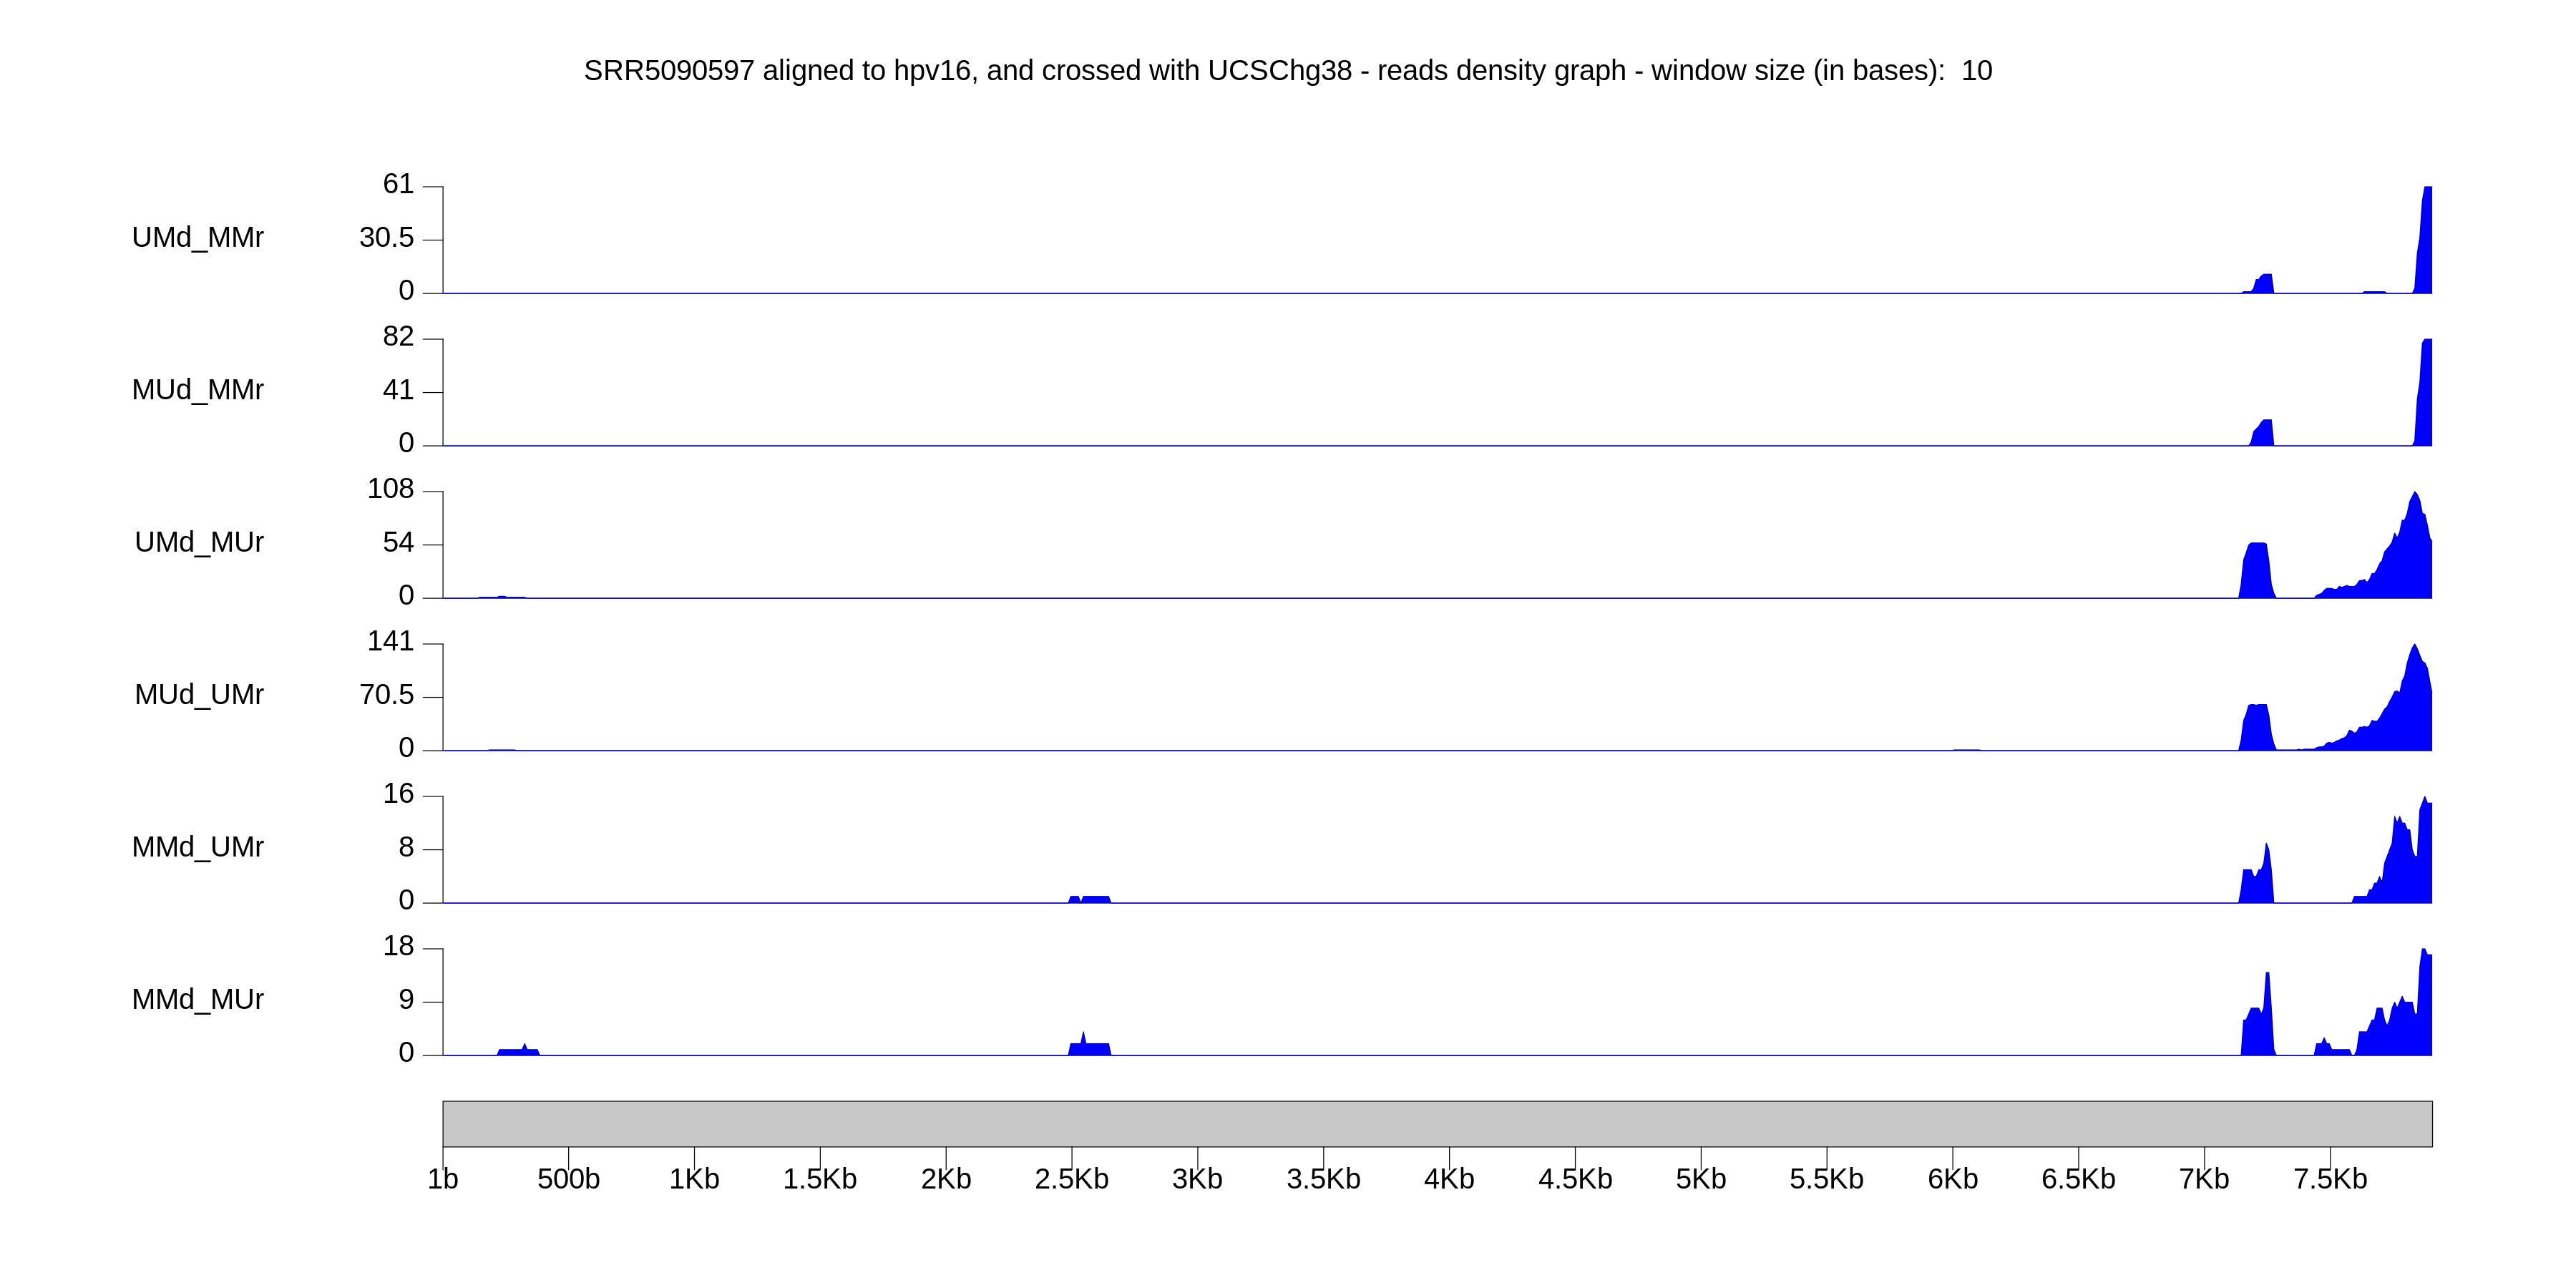

In [25]:
# Plot of all relevant crossings over the potential donor reference genome
options(repr.plot.width=30, repr.plot.height=15)
title_prepend <- paste(srr_name, ' aligned to ', donor_name, ', and crossed with ', recipient_name, sep = "")
create_viz_donor(ref_genome=donor_ref_genome, granges = donor_granges,  granges_labels = crossings, title_prepend = title_prepend)

In [26]:
# Aggregated view of all overlapping crossings for the potential donor
summary_table_donor(donor_granges, crossings, min_num_crossings = 3, min_num_reads = 3)

chr,start,stop,num_crossings,unique_crossings,num_reads
NC_001526.4,7143,7371,6,"UMd_MMr, MUd_MMr, UMd_MUr, MUd_UMr, MMd_UMr, MMd_MUr",177
NC_001526.4,7377,7906,6,"UMd_MMr, MUd_MMr, UMd_MUr, MUd_UMr, MMd_UMr, MMd_MUr",650
NC_001526.4,150,375,3,"UMd_MUr, MUd_UMr, MMd_MUr",5


## Recipient Analysis

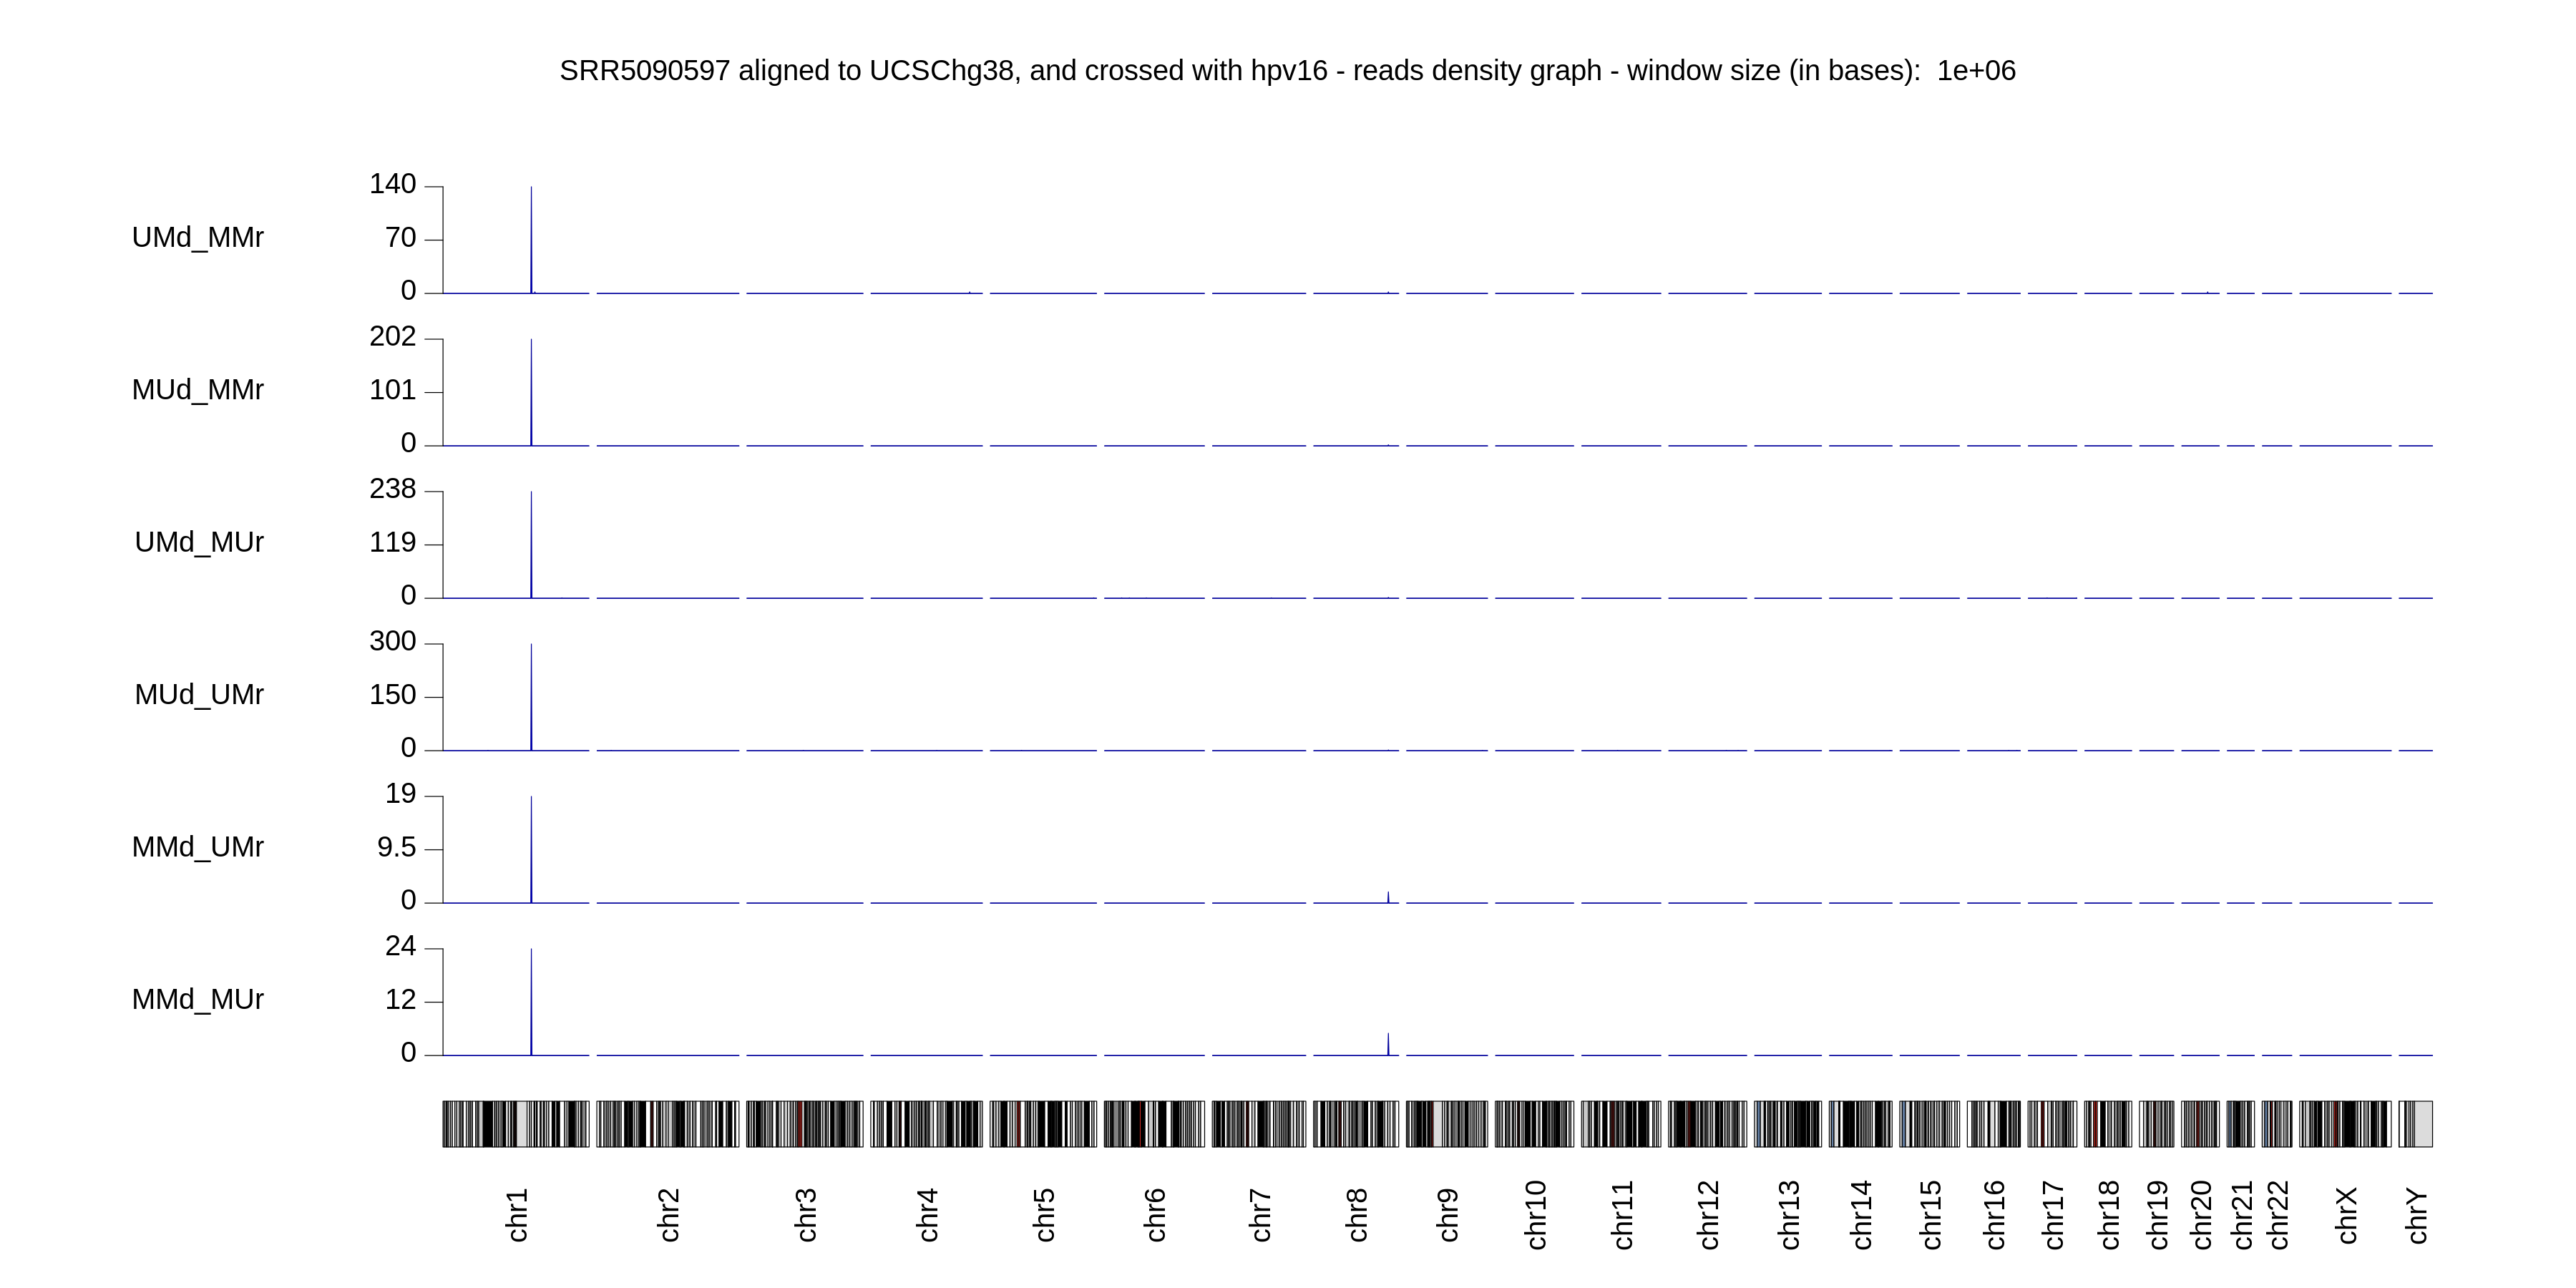

In [27]:
# Plot of all relevant crossings over the potential recipient reference genome
options(repr.plot.width=30, repr.plot.height=15)
title_prepend <- paste(srr_name, ' aligned to ', recipient_name, ', and crossed with ', donor_name, sep = "")
create_viz_recipient(ref_genome="hg38", granges = recip_granges, granges_labels = crossings, title_prepend = title_prepend)

In [28]:
# Aggregated view of all overlapping crossings for the potential recipient
crossings_table_recipient <- summary_table_recipient(recip_granges, crossings, min_num_crossings = 1, min_num_reads = 3, src = src, Hsapiens = Hsapiens)

id,chr,start,stop,num_crossings,unique_crossings,num_reads,gene_name,sequence
1,chr1,150576896,150577494,6,"UMd_MMr, MUd_MMr, UMd_MUr, MUd_UMr, MMd_UMr, MMd_MUr",386,MCL1,GCTTCCCTTGTACAGTACTGAGGCTTACAGTCATAGTTCTATTACTTGTAACTTTTACACAGGTCACTGGCATTCTTAGTGCTTCTCTTAACACTACAGTAAATTAATGAATTCGGCGGGTAATCAATTCTATGACTTGCCTGGCTACTGGCCACTTTCCTGTTCTCAACAAGGAAATTAAGTCTTTCCACCCTACCATCTTCACTAAATCTAAAAGTCCTCCTCCATAGCTTCCCAAACAAAGTTTGTTTGTTGCTGAAACTGAACTTTGCTTCTTTCAGACAGTGACTCTTCAATCAATGGGGAGCACTCTTCCCATGTATTTATTCTTGTTAGCCATAATCCTCTTGCCACTTGCTTTTCTGGCTAGGTTGCTAGGGTGCAACTCTAGGAAGTTACAGCTTGGAGTCCAACTGCATAAACTGGTTTTGGTGGTGGTGGTGGTTGGTTAAAAGTCAACTATTGCACTTACAGTAAGGCTATCTTATTAGATATGCCAAACCAGCTCCTACTCCAGCAACACCTGCAAAAGCCAGCAGCACATTCCTGATGCCACCTTCTAGGTCCTCTACATGGAAGAACTCCACAAACCCATCCTA
2,chr1,150578243,150578495,6,"UMd_MMr, MUd_MMr, UMd_MUr, MUd_UMr, MMd_UMr, MMd_MUr",528,MCL1,CCCAGCCTCTTTGTTTAACTAGCCAGTCCCGTTTTGTCCTTACGAGAACGTCTGTGATACTTTCTGCTAATGGTTCGATGCAGCTTTCTTGGTTTATGGTCTTCAAGTGTTTAGCCACAAAGGCACCAAAAGAAATGAGAGTCACAATCCTGCCCCAGTTTGTTACGCCGTCGCTGAAAACATGGATCATCACTCGAGACAACGATTTCACATCGTCTTCGTTTTTGATGTCCAGTTTCCGAAGCATGCCTGA
3,chr8,127828082,127828207,3,"UMd_MMr, UMd_MUr, MUd_UMr",4,PVT1,GGCAGGGTGTGTATCTTCTTGCTGCTGGGATGTTCTACTTTGTTGGACAGAAGGCTATGTGCTTTCTGGCAGGTTACACCTGGGTACATTTCAGTCAAGCCGAGCTGGCTCTCTCCTCATTTCATT
4,chr8,127828232,127828354,5,"UMd_MMr, MUd_MMr, UMd_MUr, MMd_UMr, MMd_MUr",6,PVT1,GCTTCTTACTGAGTGTCTAGTTCCTTGTTGTACAGGTGAGGGAAACTGAGGCCCAGAGTGGATGTGACGTTTCCGAAGGAGAGGCTCTGTAAAGTTCTGAGTAGGTGAGACTTATTATTAGCT
5,chr1,150576721,150576860,2,"UMd_MUr, MUd_UMr",6,MCL1,AGGATATCCATATTCATAACTAATTACTGAGCCTTCCGTCAAGTATTATTGGTGATAAACTAGGCTAATAAAGTAAGAATCATGGAAACCAAGCCAAAGTATAACAGGTATAAAAGTCCTGAACACTTGGACTTTCTAAG
6,chr8,127795932,127796011,1,MMd_MUr,4,"PVT1, MIR1204",GGACAAATACAGAATCCGTGTCTGGGAGAAACCTCGTGGCCTGGTCTCCATTATTTGAGATGAGTTACATCTTGGAGGTG


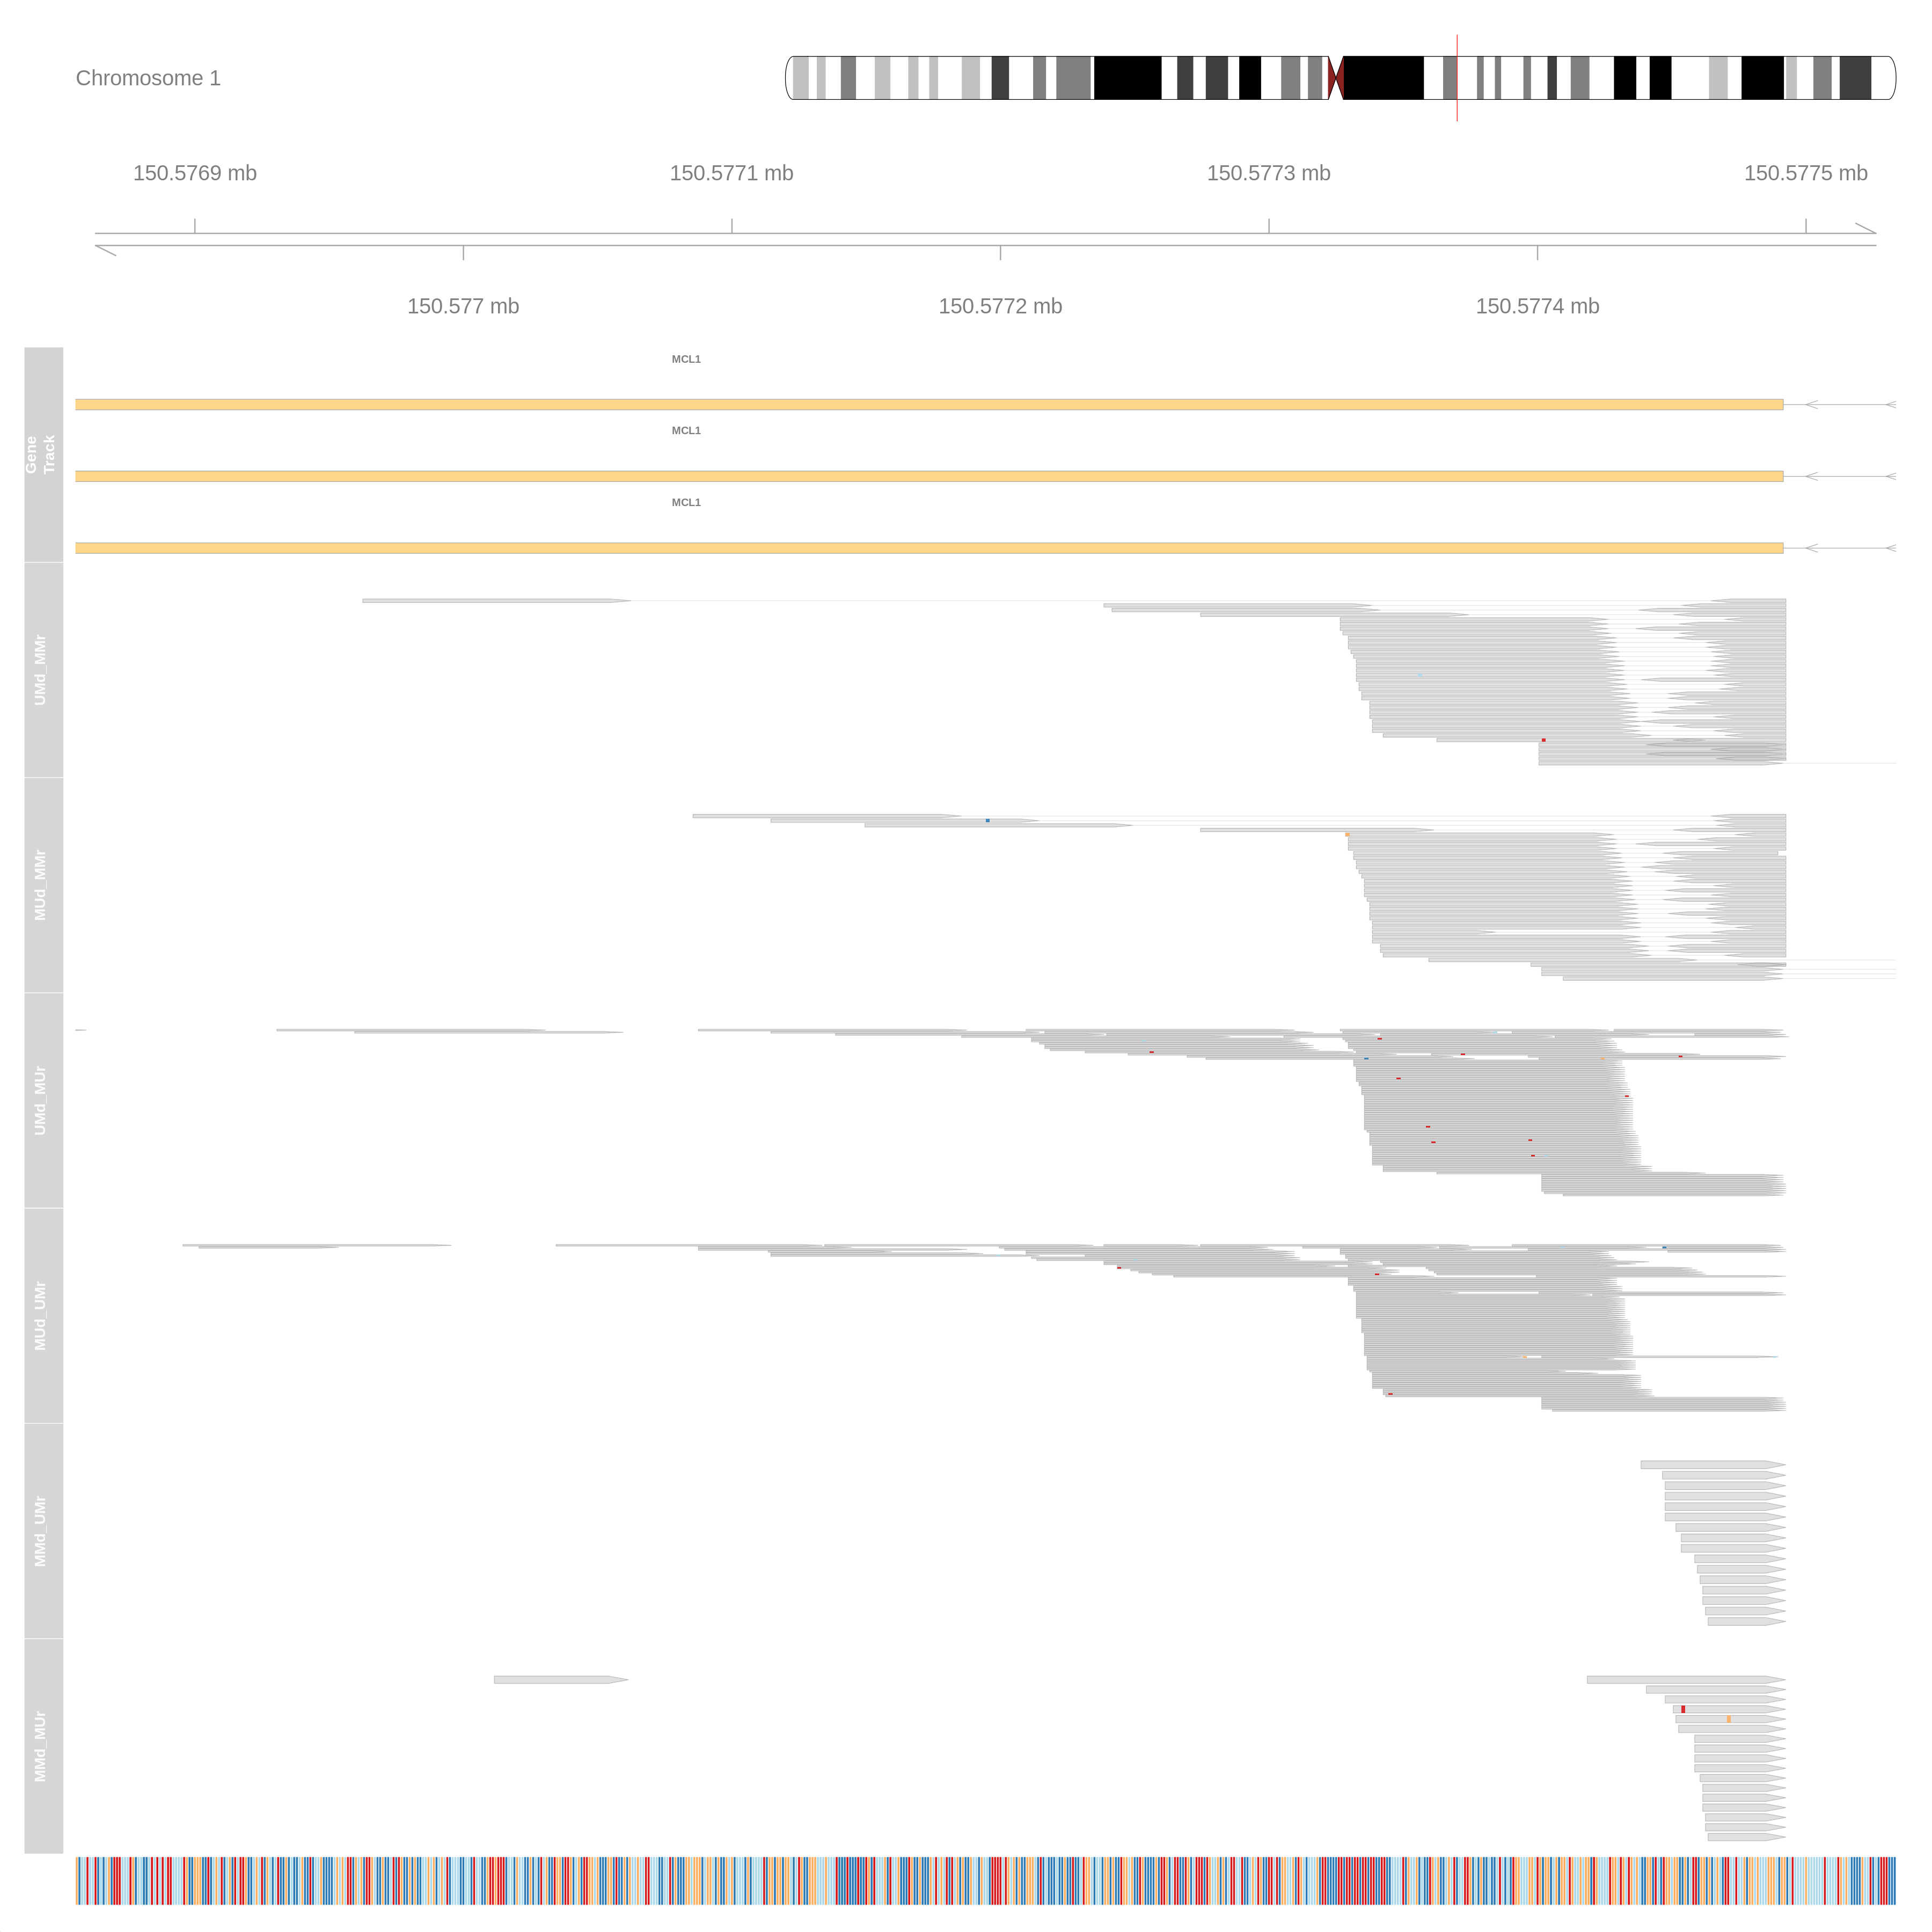

In [29]:
plot_reads_region(id = 1, crossings_table = crossings_table_recipient, extend_left = 20, extend_right = 20, ref_genome = recipient_ref_genome)